<a href="https://colab.research.google.com/github/YuriiKlim/Camp_test_tasks/blob/Tasks_without_comments/Test_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# **Task 1**

In [ ]:
random_values = [random.randint(0, 100) for _ in range(20)]
print("Random Values:", random_values)

Random Values: [16, 85, 82, 38, 58, 40, 96, 9, 1, 58, 79, 72, 12, 9, 68, 27, 64, 33, 16, 44]


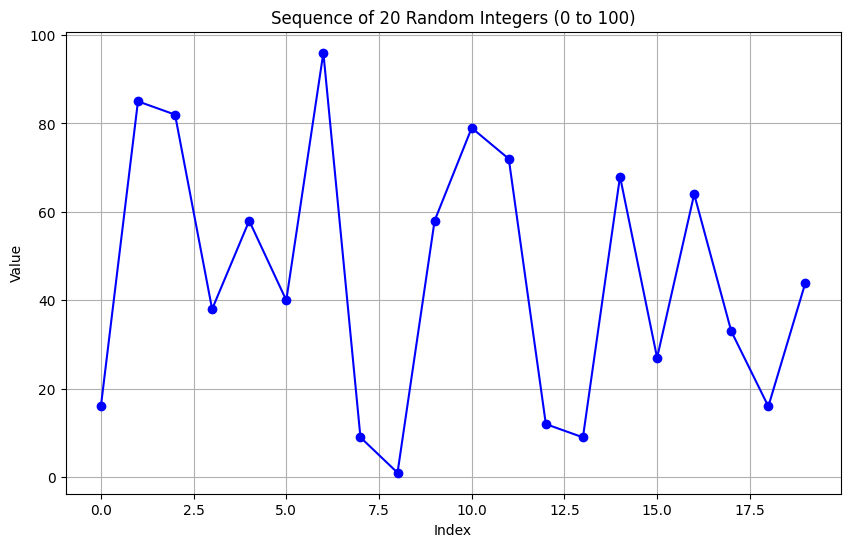

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(random_values, marker='o', linestyle='-', color='blue')
plt.title("Sequence of 20 Random Integers (0 to 100)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
def find_deepest_lake(random_values):
    n = len(random_values)
    max_depth = 0
    best_bounds = None
    for i in range(n):
        for j in range(i + 2, n):
            water_level = min(random_values[i], random_values[j])
            valley = random_values[i+1:j]
            if all(point < water_level for point in valley):
                valley_min = min(valley)
                depth = water_level - valley_min
                if depth > max_depth:
                    max_depth = depth
                    best_bounds = (i, j)
    return max_depth, best_bounds

In [ ]:
def plot_deepest_lake(random_values, lake_bounds):
    import matplotlib.pyplot as plt
    import numpy as np

    x = list(range(len(random_values)))
    plt.figure(figsize=(10, 6))
    plt.plot(x, random_values, marker='o', linestyle='-', color='blue', label='Random Values')

    if lake_bounds is not None:
        i, j = lake_bounds
        water_level = min(random_values[i], random_values[j])
        valley_bottom = min(random_values[i+1:j])
        bottom_index = random_values.index(valley_bottom, i+1, j)

        plt.plot(range(i, j+1), random_values[i:j+1], marker='o', linestyle='-', color='red', label='Lake Boundary')

        plt.axhline(water_level, color='blue', linestyle=':', label='Water Level')
        plt.axhline(valley_bottom, color='green', linestyle=':', label='Lake Bottom')
    else:
        plt.text(0.5, 0.5, 'No lake found', horizontalalignment='center',
                 verticalalignment='center', transform=plt.gca().transAxes, fontsize=16, color='blue')

    plt.title("Random Values and Deepest Lake")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
depth, lake_bounds = find_deepest_lake(random_values)
print("Deepest Lake Depth:", depth)
if lake_bounds:
    print("Deepest Lake Boundaries (indices):", lake_bounds)
else:
    print("No lake found.")

Deepest Lake Depth: 78
Deepest Lake Boundaries (indices): (6, 10)


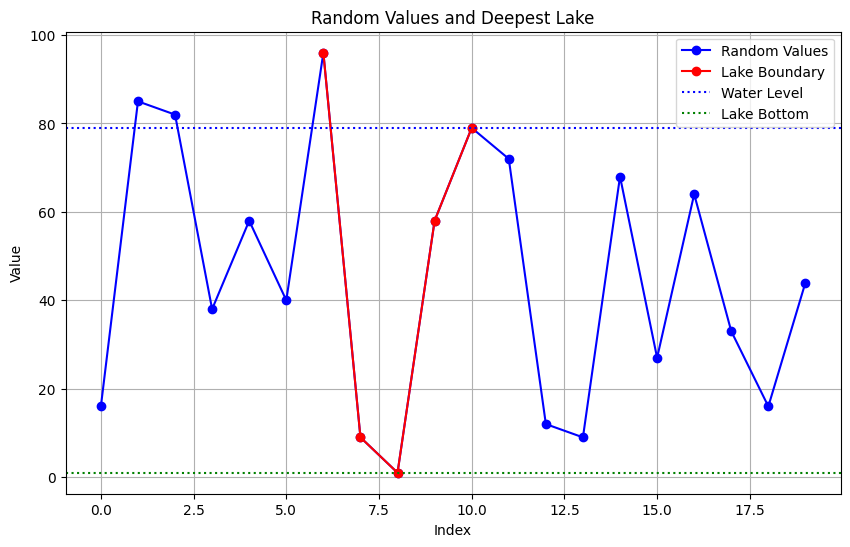

In [ ]:
plot_deepest_lake(random_values, lake_bounds)

# **Task 2**

In [ ]:
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

In [ ]:
grid = np.random.randint(0, 2, (20, 20))
print("Initial 20x20 grid:")
print(grid)

Initial 20x20 grid:
[[0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0]
 [0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1]
 [0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0]
 [0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1]
 [1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1]
 [1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0]
 [0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1]
 [1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1]
 [1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1]
 [1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1]
 [0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1]
 [0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1]
 [1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0]]


In [ ]:
def update_state(current_grid):
    rows, cols = current_grid.shape
    new_grid = np.zeros((rows, cols), dtype=int)

    for i in range(rows):
        for j in range(cols):
            living_neighbors = 0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < rows and 0 <= nj < cols:
                        living_neighbors += current_grid[ni, nj]

            if current_grid[i, j] == 1:
                if living_neighbors == 2 or living_neighbors == 3:
                    new_grid[i, j] = 1
                else:
                    new_grid[i, j] = 0
            else:
                if living_neighbors == 3:
                    new_grid[i, j] = 1
                else:
                    new_grid[i, j] = 0
    return new_grid

In [ ]:
steps = 50 #too see the final result

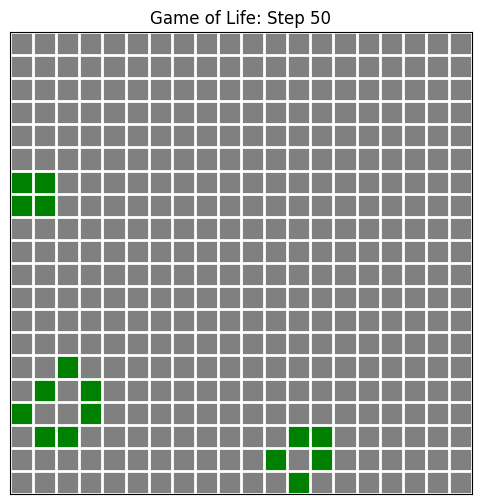

In [ ]:
current_grid = grid.copy()
for step in range(steps):
    current_grid = update_state(current_grid)

grid_for_anim = grid.copy()

fig, ax = plt.subplots(figsize=(6, 6))
cmap = ListedColormap(["gray", "green"])
im = ax.imshow(grid_for_anim, cmap=cmap)

rows, cols = grid_for_anim.shape
for i in range(rows + 1):
    ax.axhline(i - 0.5, color='white', linewidth=2)
for j in range(cols + 1):
    ax.axvline(j - 0.5, color='white', linewidth=2)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title("Game of Life: Step 0")

def animate(frame):
    global grid_for_anim
    grid_for_anim = update_state(grid_for_anim)
    im.set_data(grid_for_anim)
    ax.set_title("Game of Life: Step {}".format(frame + 1))
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=steps, interval=500, blit=True, repeat=True)

HTML(ani.to_jshtml())

# **Task 3**

In [ ]:
p_heads = np.array([0.8, 0.9, 0.1, 0.2, 0.3])

prior = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

evidence = ['H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H']

predicted_probs = []

for outcome in evidence:
    if outcome == 'H':
        likelihood = p_heads
    else:
        likelihood = 1 - p_heads
    unnorm = prior * likelihood
    prior = unnorm / unnorm.sum()

    pred = (prior * p_heads).sum()

    predicted_probs.append(round(pred, 2))

print("List of predictive probabilities after each test:")
print(predicted_probs)

List of predictive probabilities after each test:
[0.69, 0.44, 0.64, 0.77, 0.82, 0.73, 0.55, 0.69, 0.77]
